In [1]:
from pythtb import * # import TB model class
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import ase
import ase.io
import ase.neighborlist
import ase.visualize.plot

colors = ['black', 'white']
sns_colors = sns.color_palette(colors, n_colors=2)

In [2]:
len_of_agnr = 5

In [3]:
file_name = "../xyz_files/7agnr/11_AGNR_len_{}.xyz".format(len_of_agnr)
geom = ase.io.read(file_name)
lat = [
    [1.0,0.0],
    [0.0,1.0]
]
geom.center(about=0.0)
orb = []

for at in geom:
    orb.append(at.position[:2])
    

x_max, y_max = np.max(orb, axis=0)
x_min, y_min = np.min(orb, axis=0)

max_coord_x = x_max + 1
min_coord_x = x_min - 1
max_coord_y = y_max + 1
min_coord_y = y_min - 1

In [4]:
def visualize_backbone(ax, atoms):
    i_arr, j_arr = ase.neighborlist.neighbor_list('ij', atoms, 1.8)
    for i, j in zip(i_arr, j_arr):
        if i < j:
            p1 = atoms.positions[i]
            p2 = atoms.positions[j]
            ax.plot([p1[0], p2[0]], [p1[1], p2[1]], 'k-', linewidth=2.0, solid_capstyle='round')
            
def visualize_evec(ax, atoms, evec):
    for at, e in zip(atoms, evec):
        p = at.position
        mod = np.abs(e)
        phase = np.angle(e)/np.pi
        col = sns_colors[int(phase)]
        circ = plt.Circle(p[:2], 0.15*np.cbrt(mod), fc=col, zorder=10, linewidth=1, ec='black')
        ax.add_artist(circ)

In [5]:
indexes = np.arange(110)

In [6]:
spin_difference = [1 if i%2 else -1 for i in indexes]

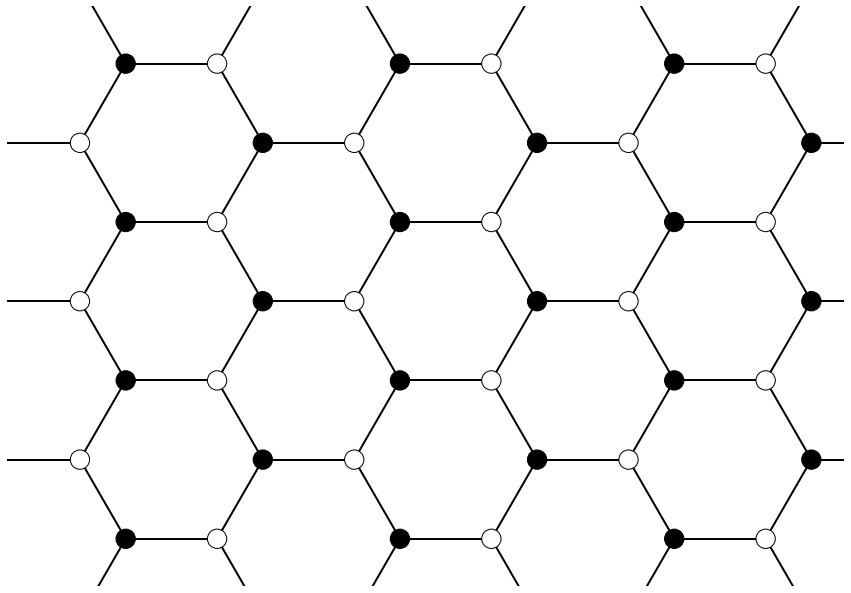

In [7]:
fig=plt.figure(figsize=(15,15))
ax = plt.gca()
ax.set_aspect('equal')
visualize_backbone(ax, geom)
visualize_evec(ax, geom, spin_difference)
plt.axis('off')

# plt.xlim([min_coord_x, max_coord_x])
# plt.ylim([min_coord_y, max_coord_y])

plt.xlim([1, 14])
plt.ylim([0.5, 9.5])

path = "../figures/figures_for_thesis/"
fig_name = path + "bipartite_lattice.pdf".format(len_of_agnr)
plt.savefig(fig_name, dpi=1000, bbox_inches='tight')